# Find the Equivalent Ellipse

This notebook makes defines an object class which takes cutout shape defining points as an input along with a user defined cutout factor `circle_fit` function and returns the equivalent ellipse. An example of how to define the `circle_fit` function is given in the [example below](#Defining-the-circle-fit-from-example-measured-factors).

To calculate the equivalent ellipse a seriese of objects are used which can each be found in their own notebook. These are outlined as such:

 * Finding the position of maximum dose output defined in [FindingCentre.ipynb](FindingCentre.ipynb)
   * Which makes use of [SectorIntegration.ipynb](SectorIntegration.ipynb)
 * Cutout straightening defined in [CutoutStraightening.ipynb](CutoutStraightening.ipynb)
 * Ellipse fitting found in [EllipseFitting.ipynb](EllipseFitting.ipynb)
 
An example of using the `equivalent_ellipse` object found within this notebook is given [at the bottom of this notebook](#Example)

## Copyright information

Copyright © 2015 Simon Biggs

This program is free software: you can redistribute it and/or modify it under the terms of the GNU Affero General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version.

This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU Affero General Public License for more details.

You should have received a copy of the GNU Affero General Public License along with this program. If not, see http://www.gnu.org/licenses/.

## Import modules

In [1]:
import numpy as np
from scipy.interpolate import UnivariateSpline

import matplotlib.pyplot as plt
from matplotlib import pylab
%matplotlib inline

import descartes as des

import sys
sys.path.append("../")

from electronfactors.ellipse.equivalent import EquivalentEllipse

### Define the cutout

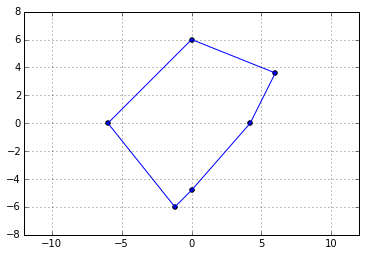

In [2]:
XCoords = np.array([-1,-0.2,0,0.7,1,0])*6
YCoords = np.array([0,-1,-.8,0,.6,1])*6

plt.scatter(XCoords, YCoords)
plt.plot(np.append(XCoords, XCoords[0]), 
         np.append(YCoords, YCoords[0]))
plt.axis("equal")
plt.grid(True)

### Defining the circle fit from example measured factors

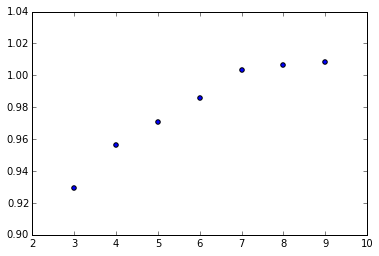

In [3]:
circle_diameter = np.array([3,4,5,6,7,8,9])
circle_factors = np.array([0.9296,0.9562,0.9705,0.9858,1.0032,1.0067,1.0084])

plt.scatter(circle_diameter, circle_factors)

In [4]:
def circle_fit(radii):
    
    circle_radii = circle_diameter/2
    
    spline = UnivariateSpline(circle_radii, circle_factors)
    results = spline(radii)
    
    results[radii>np.max(circle_radii)] = np.max(circle_factors)
    results[radii<np.min(circle_radii)] = 0
    
    return results

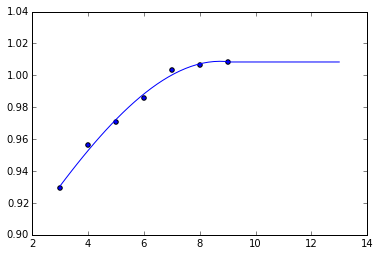

In [5]:
t = np.linspace(circle_diameter.min(),13)
y = circle_fit(t/2)

plt.scatter(circle_diameter, circle_factors)
plt.plot(t,y)

### Finding the equivalent ellipse

In [6]:
equivalentEllipse = EquivalentEllipse(
    x=XCoords, y=YCoords, circle_fit=circle_fit, weighted=False, min_distance=1.5, n=1
)

# The ellipse fit method needs to be weighted according to the derivative of `circle_fit`. 
# Width is more important than length.

(-8.0, 8.0, -8.0, 8.0)

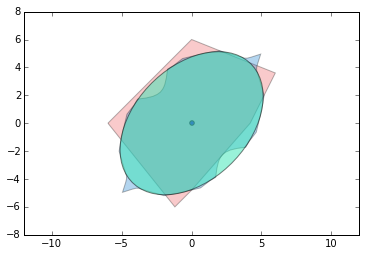

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)

patch = des.PolygonPatch(equivalentEllipse.centredCutout, fc=np.random.uniform(size=3), alpha=0.3)
ax.add_patch(patch)

patch = des.PolygonPatch(equivalentEllipse.straightenedCutout, fc=np.random.uniform(size=3), alpha=0.3)
ax.add_patch(patch)

patch = des.PolygonPatch(equivalentEllipse.eqEllipse, fc=np.random.uniform(size=3), alpha=0.5)
ax.add_patch(patch)

plt.scatter(0,0)

ax.set_xlim([-equivalentEllipse._Straightened.maxRadii, equivalentEllipse._Straightened.maxRadii])
ax.set_ylim([-equivalentEllipse._Straightened.maxRadii, equivalentEllipse._Straightened.maxRadii])
ax.axis("equal")

In [8]:
equivalentEllipse.centre

array([  1.81588706e-06,   1.75983722e-06])

In [9]:
equivalentEllipse.width

8.1186613637070089

In [10]:
equivalentEllipse.length

12.024895048348929

(-1.5, 1.5, -1.5, 1.5)

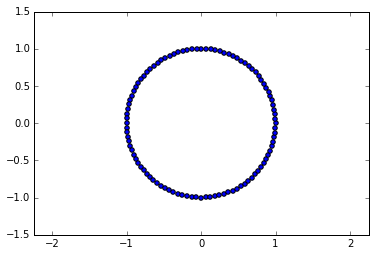

In [11]:
dtheta = 2*np.pi / 100

theta = np.arange(-np.pi, np.pi, dtheta) + np.random.uniform(-np.pi, np.pi)
x = np.cos(theta)
y = np.sin(theta)

plt.scatter(x, y)

plt.axis("equal")